# 1. Importing libraries and data

In [63]:
# Importing libraries

# Data Wrangling and Viz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Creating a Pipeline fot import Data
def importdata(filename):
    path = "C:\\Users\\Usuario\\Documents\\Ciência de Dados\\Datasets\\"
    return pd.read_csv(path + filename)

In [3]:
# Importing data
df = importdata('yield_df.csv')

# 2. Checking data and EDA

## 2.1. Checking data

In [4]:
# Checking Dataset Format and columns
print(30*'-', 'Shape', 30*'-')
print(df.shape)
print(30*'-', 'Columns', 30*'-')
print(df.columns)
print(30*'-', 'Short description', 30*'-')
print(df.describe())

------------------------------ Shape ------------------------------
(28242, 8)
------------------------------ Columns ------------------------------
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
------------------------------ Short description ------------------------------
         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
me

In [5]:
# Renaming 'Unnamed: 0' to 'Index'
df.columns = ['Index', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [7]:
df = df.set_index('Index')

In [8]:
# Visualizing df
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Index,,,,,,,
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
# Checking nulls
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [10]:
# Checking how many differente attributes has on 'Item' and 'Area'
item = df['Item'].nunique()
area = df['Area'].nunique()

print(f'Item: {item}, Area: {area}')

Item: 10, Area: 101


- Original shape: (28242, 8)
- Original columns: ['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    - Need to set 'Unnamed: 0' as index
- The columns 'Item' and 'Area' have respectively 10 and 101 unique values, this will be useful when I will need to use Label or One Hot Encoding.

## 2.2. EDA

In [11]:
# Describing data
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


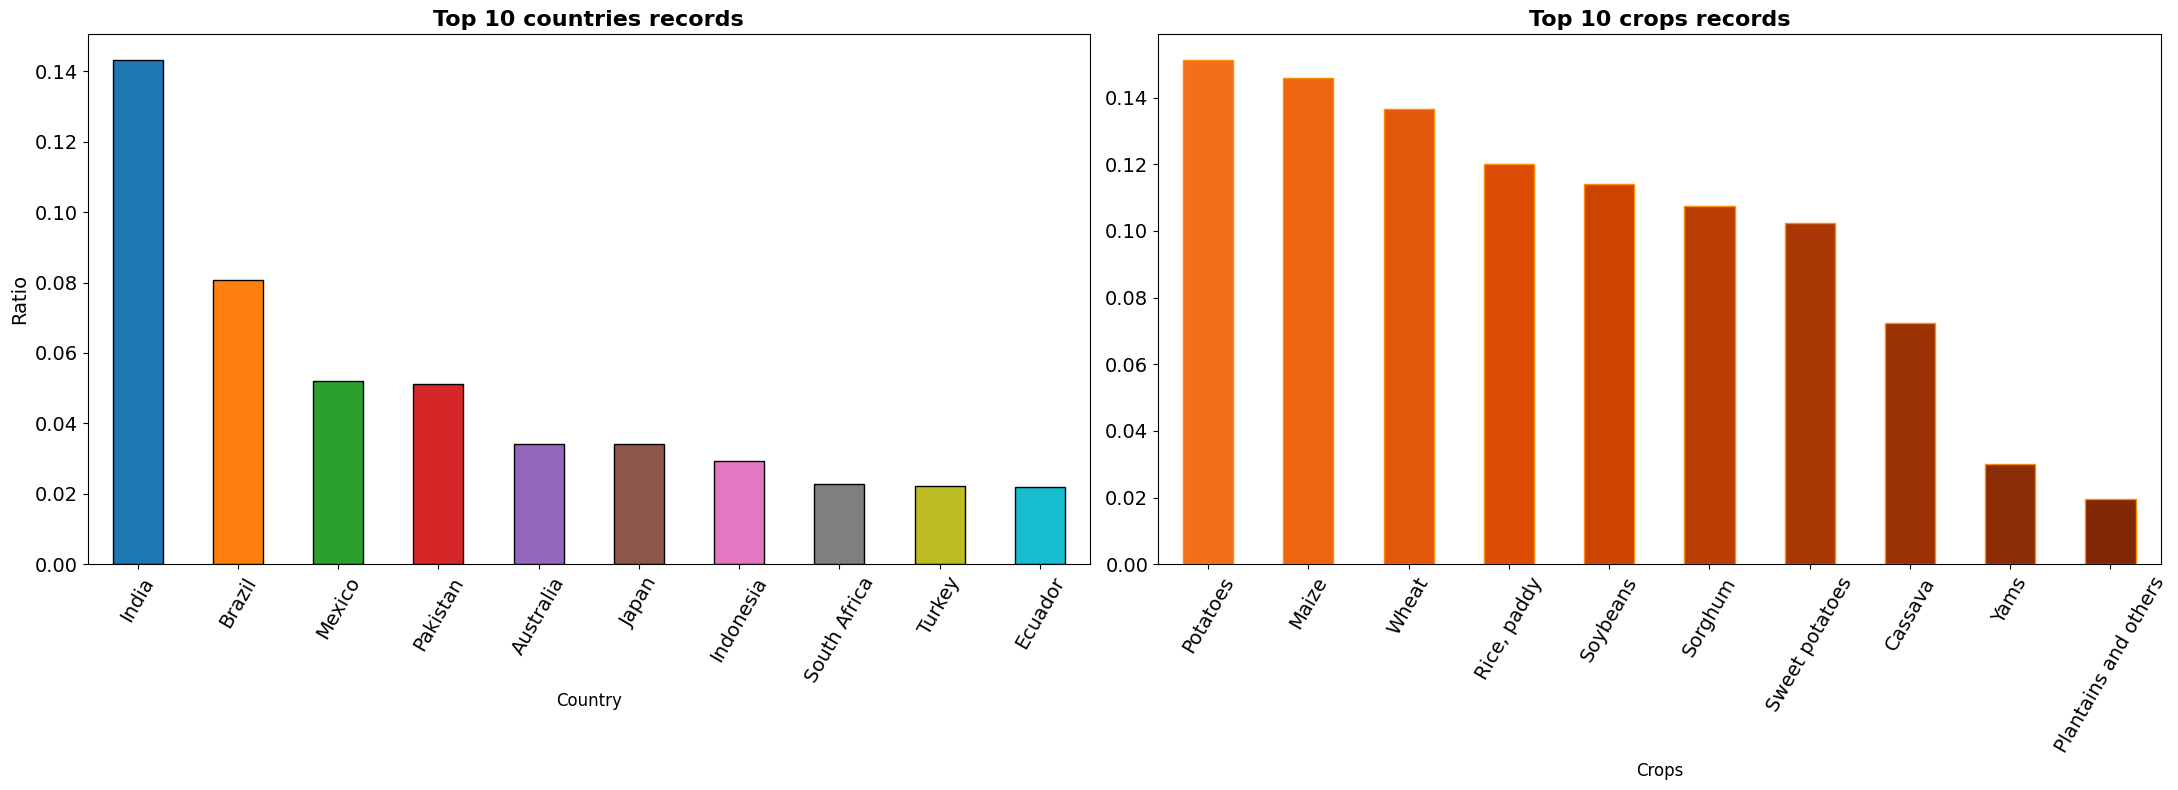

In [12]:
# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

# Checking countries that most appear
plt.subplot(1,2,1)
colors1 = plt.cm.tab10(np.linspace(0,1,10)) 
df['Area'].value_counts(normalize=True).head(10).plot(kind='bar', color=colors1, edgecolor='black')
plt.title('Top 10 countries records', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
colors2 = plt.cm.Oranges(np.linspace(0.6, 1, 10))
df['Item'].value_counts(normalize=True).plot(kind='bar', color=colors2, edgecolor='darkorange')
plt.title('Top 10 crops records', fontsize=16, fontweight='bold')
plt.xlabel('Crops', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [13]:
# Analyzing report
print('-' * 30, 'Analysis report', '-' * 30)
print('=' * 21, 'Ratio of top 10 countries recorded', '=' * 21)
print(df['Area'].value_counts(normalize=True).head(10))
print()
print('=' * 28, 'Ratio of crops recorded', '=' * 28)
print(df['Item'].value_counts(normalize=True))

------------------------------ Analysis report ------------------------------
===================== Ratio of top 10 countries recorded =====================
Area
India           0.143333
Brazil          0.080625
Mexico          0.052121
Pakistan        0.051307
Australia       0.034204
Japan           0.034204
Indonesia       0.029318
South Africa    0.022803
Turkey          0.022130
Ecuador         0.021989
Name: proportion, dtype: float64

============================ Ratio of crops recorded ============================
Item
Potatoes                0.151406
Maize                   0.145917
Wheat                   0.136570
Rice, paddy             0.119963
Soybeans                0.114121
Sorghum                 0.107606
Sweet potatoes          0.102330
Cassava                 0.072410
Yams                    0.029991
Plantains and others    0.019687
Name: proportion, dtype: float64


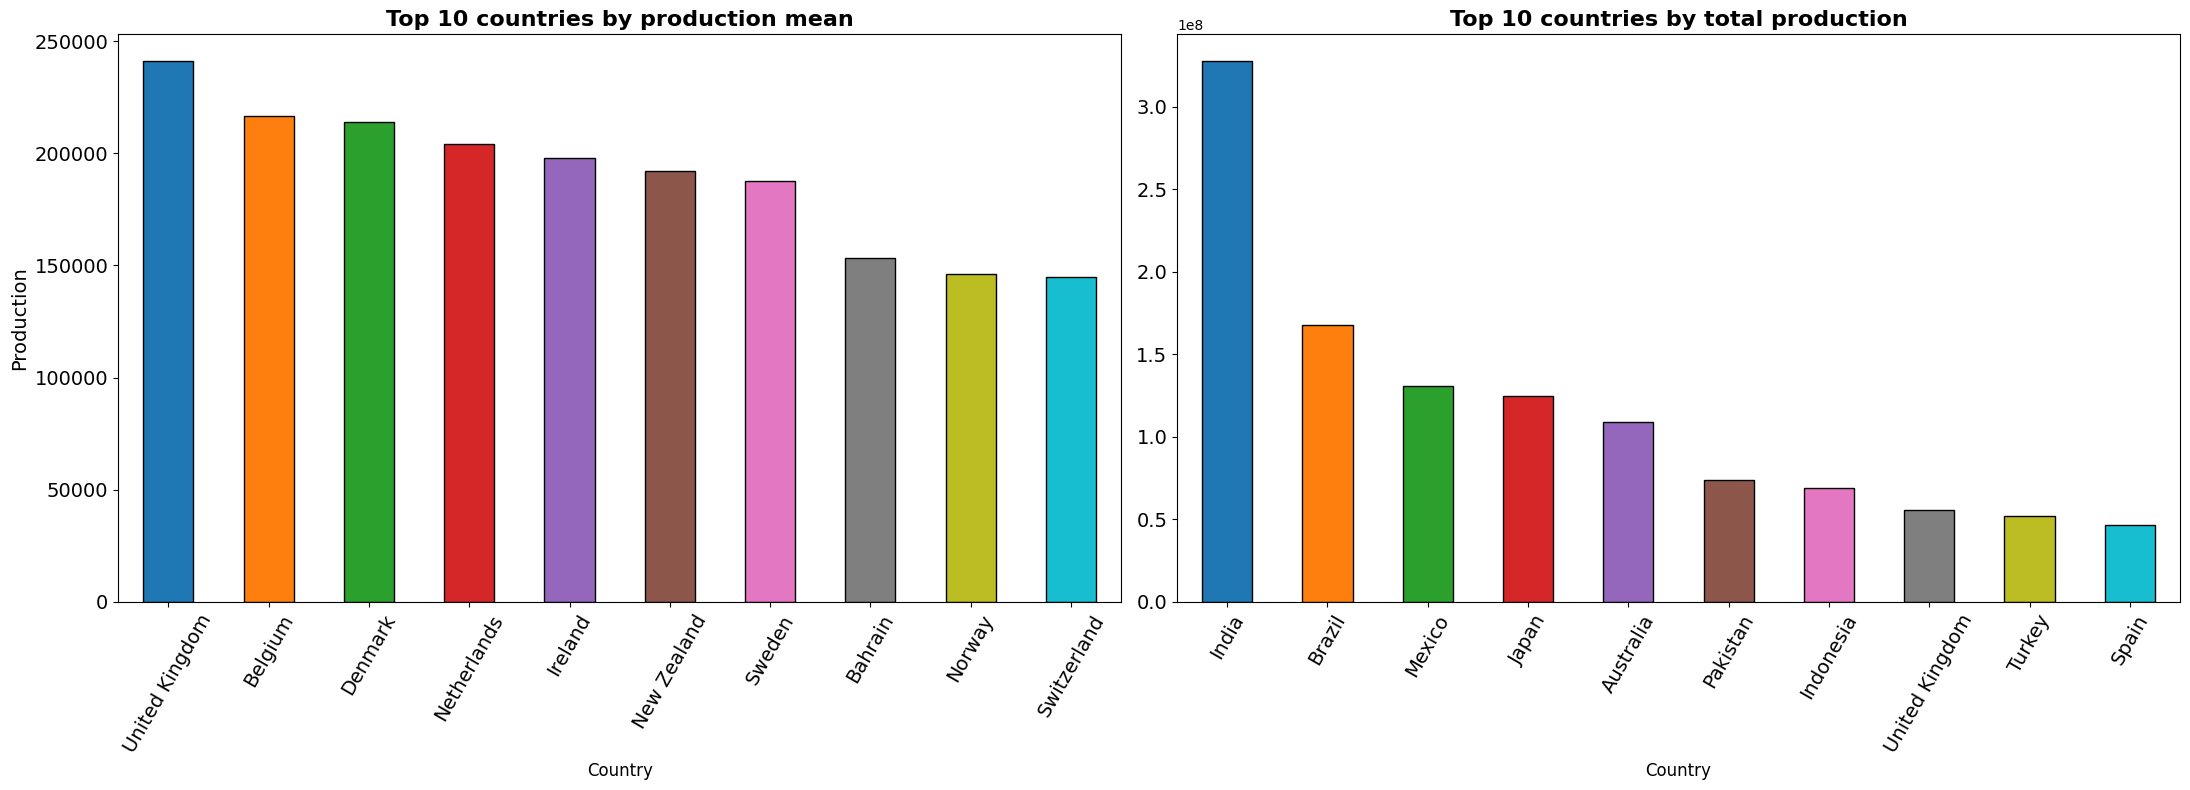

In [14]:
# Calculating Top 10 countries by production mean
countries_mean = df.groupby('Area')['hg/ha_yield'].mean()
countries_mean = countries_mean.sort_values(ascending=False)
top10_countries_mean = countries_mean.head(10)

# Calculating Top 10 countries by total production
countries = df.groupby('Area')['hg/ha_yield'].sum()
countries = countries.sort_values(ascending=False)
top10_countries = countries.head(10)

# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

# Checking Top 10 countries by production mean
plt.subplot(1,2,1)
colors3 = plt.cm.tab10(np.linspace(0,1,len(top10_countries_mean)))
top10_countries_mean.plot(kind='bar', color=colors3, edgecolor='black')
plt.title('Top 10 countries by production mean', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Production', fontsize=14)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

# Checking Top 10 countries by total production
plt.subplot(1,2,2)
top10_countries.plot(kind='bar', color=colors3, edgecolor='black')
plt.title('Top 10 countries by total production', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [15]:
# Calculating global mean and the proportion for 'Area' and 'Item'
global_mean = df['hg/ha_yield'].mean()
countries_ratio_mean = df.groupby('Area')['hg/ha_yield'].mean() / global_mean * 100
countries_ratio_mean = countries_ratio_mean.sort_values(ascending=False).head(10)
total_production = df['hg/ha_yield'].sum()
countries_ratio = df.groupby('Area')['hg/ha_yield'].sum() / total_production * 100
countries_ratio = countries_ratio.sort_values(ascending=False).head(10)

In [16]:
# Report with mean as metric
print('-' * 30, 'Analysis report', '-' * 30)
print('=' * 25, 'Most Efficient Countries', '=' * 25)
print(countries_ratio_mean)
print()
print('=' * 25, 'Most Productive Countries', '=' * 25)
print(countries_ratio)

------------------------------ Analysis report ------------------------------
========================= Most Efficient Countries =========================
Area
United Kingdom    312.713898
Belgium           280.933291
Denmark           277.772569
Netherlands       264.947923
Ireland           256.852871
New Zealand       249.089586
Sweden            243.215309
Bahrain           198.872064
Norway            189.628822
Switzerland       188.129804
Name: hg/ha_yield, dtype: float64

========================= Most Productive Countries =========================
Area
India             15.045920
Brazil             7.699426
Mexico             6.010115
Japan              5.719802
Australia          5.013972
Pakistan           3.395803
Indonesia          3.179644
United Kingdom     2.546710
Turkey             2.401681
Spain              2.149381
Name: hg/ha_yield, dtype: float64


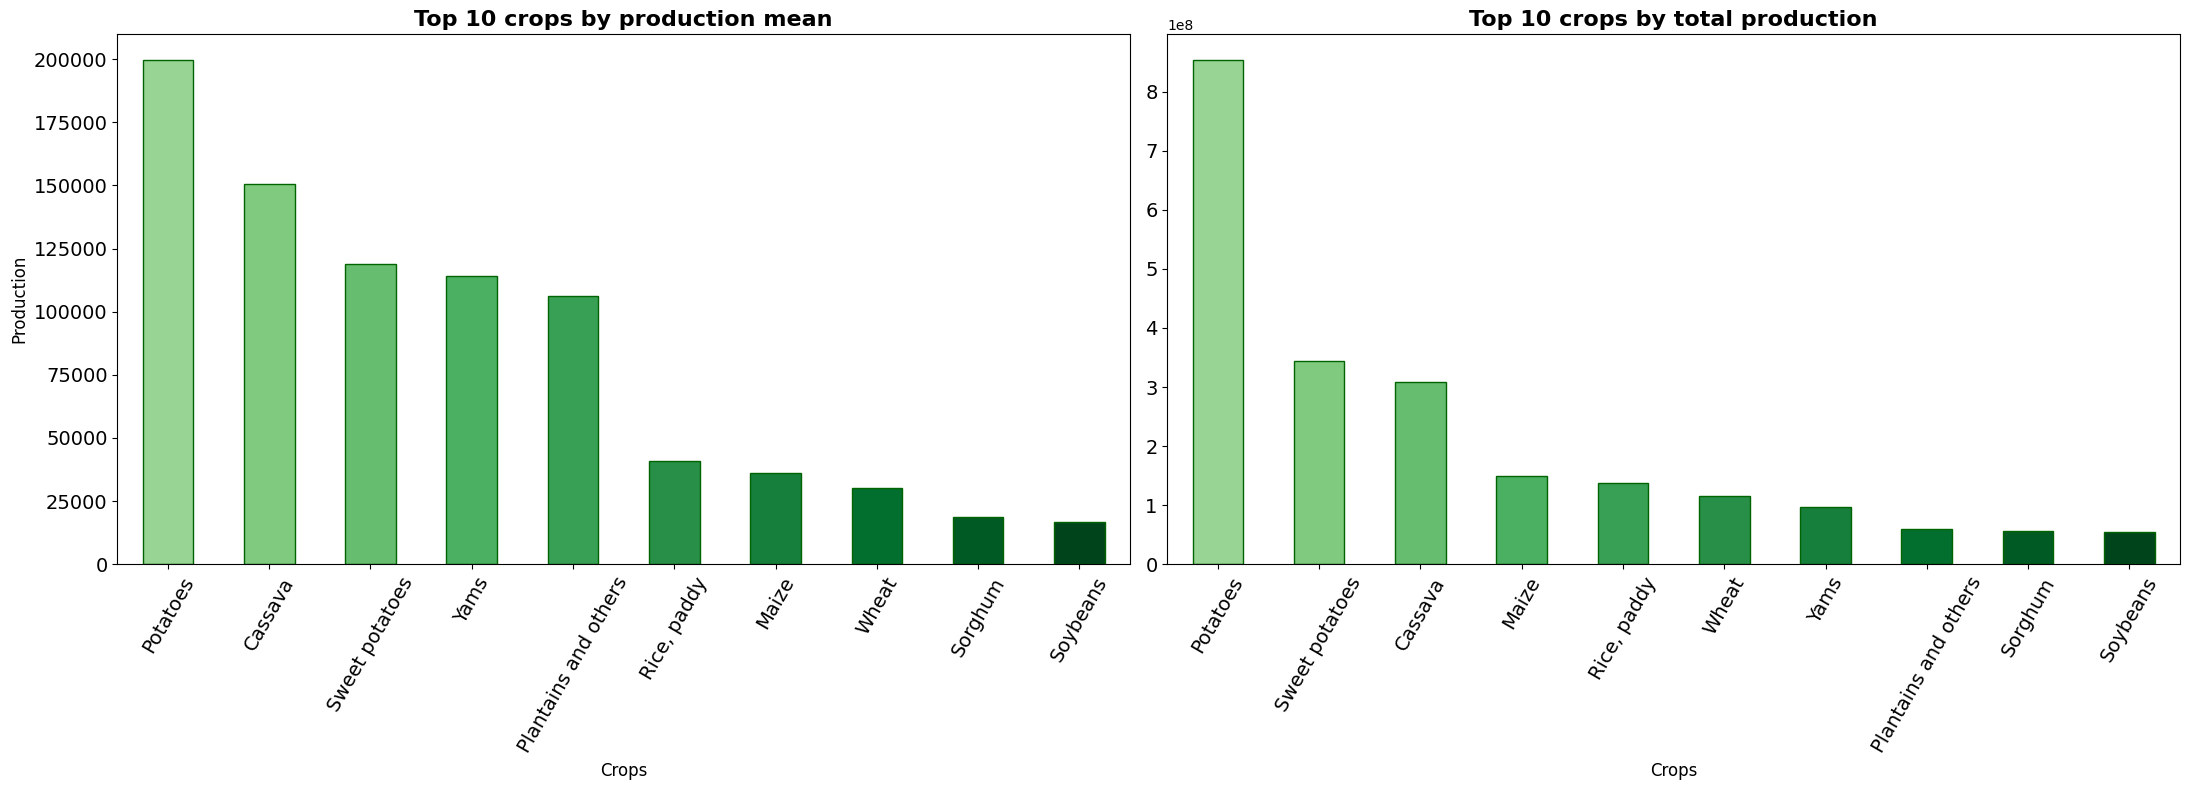

In [17]:
# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

# Checking Top 10 crop by production mean
plt.subplot(1,2,1)
colors4 = plt.cm.Greens(np.linspace(0.4, 1, 10))
df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).plot(kind='bar', color=colors4,
                                                                           edgecolor='darkgreen')
plt.title('Top 10 crops by production mean', fontsize=16, fontweight='bold')
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

# Checking Top 10 crop by total production
plt.subplot(1,2,2)
df.groupby('Item')['hg/ha_yield'].sum().sort_values(ascending=False).plot(kind='bar', color=colors4,
                                                                           edgecolor='darkgreen')
plt.title('Top 10 crops by total production', fontsize=16, fontweight='bold')
plt.xlabel('Crops', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [18]:
# Calculating total production and the proportion for 'Area' and 'Item'
crops_ratio_mean = df.groupby('Item')['hg/ha_yield'].mean() / global_mean * 100
crops_ratio_mean = crops_ratio_mean.sort_values(ascending=False)
crops_ratio = df.groupby('Item')['hg/ha_yield'].sum() / total_production * 100
crops_ratio = crops_ratio.sort_values(ascending=False)

In [19]:
# Report with sum as metric
print('-' * 30, 'Analysis report', '-' * 30)
print('=' * 25, 'Most Efficient Crops', '=' * 25)
print(crops_ratio_mean)
print()
print('=' * 25, 'Most Produced Crops', '=' * 25)
print(crops_ratio)

------------------------------ Analysis report ------------------------------
========================= Most Efficient Crops =========================
Item
Potatoes                259.302932
Cassava                 195.292615
Sweet potatoes          154.513492
Yams                    148.131616
Plantains and others    137.620681
Rice, paddy              52.860056
Maize                    47.123297
Wheat                    39.084965
Sorghum                  24.185557
Soybeans                 21.713653
Name: hg/ha_yield, dtype: float64

========================= Most Produced Crops =========================
Item
Potatoes                39.259944
Sweet potatoes          15.811344
Cassava                 14.141116
Maize                    6.876110
Rice, paddy              6.341260
Wheat                    5.337820
Yams                     4.442585
Plantains and others     2.709337
Sorghum                  2.602504
Soybeans                 2.477980
Name: hg/ha_yield, dtype: float64


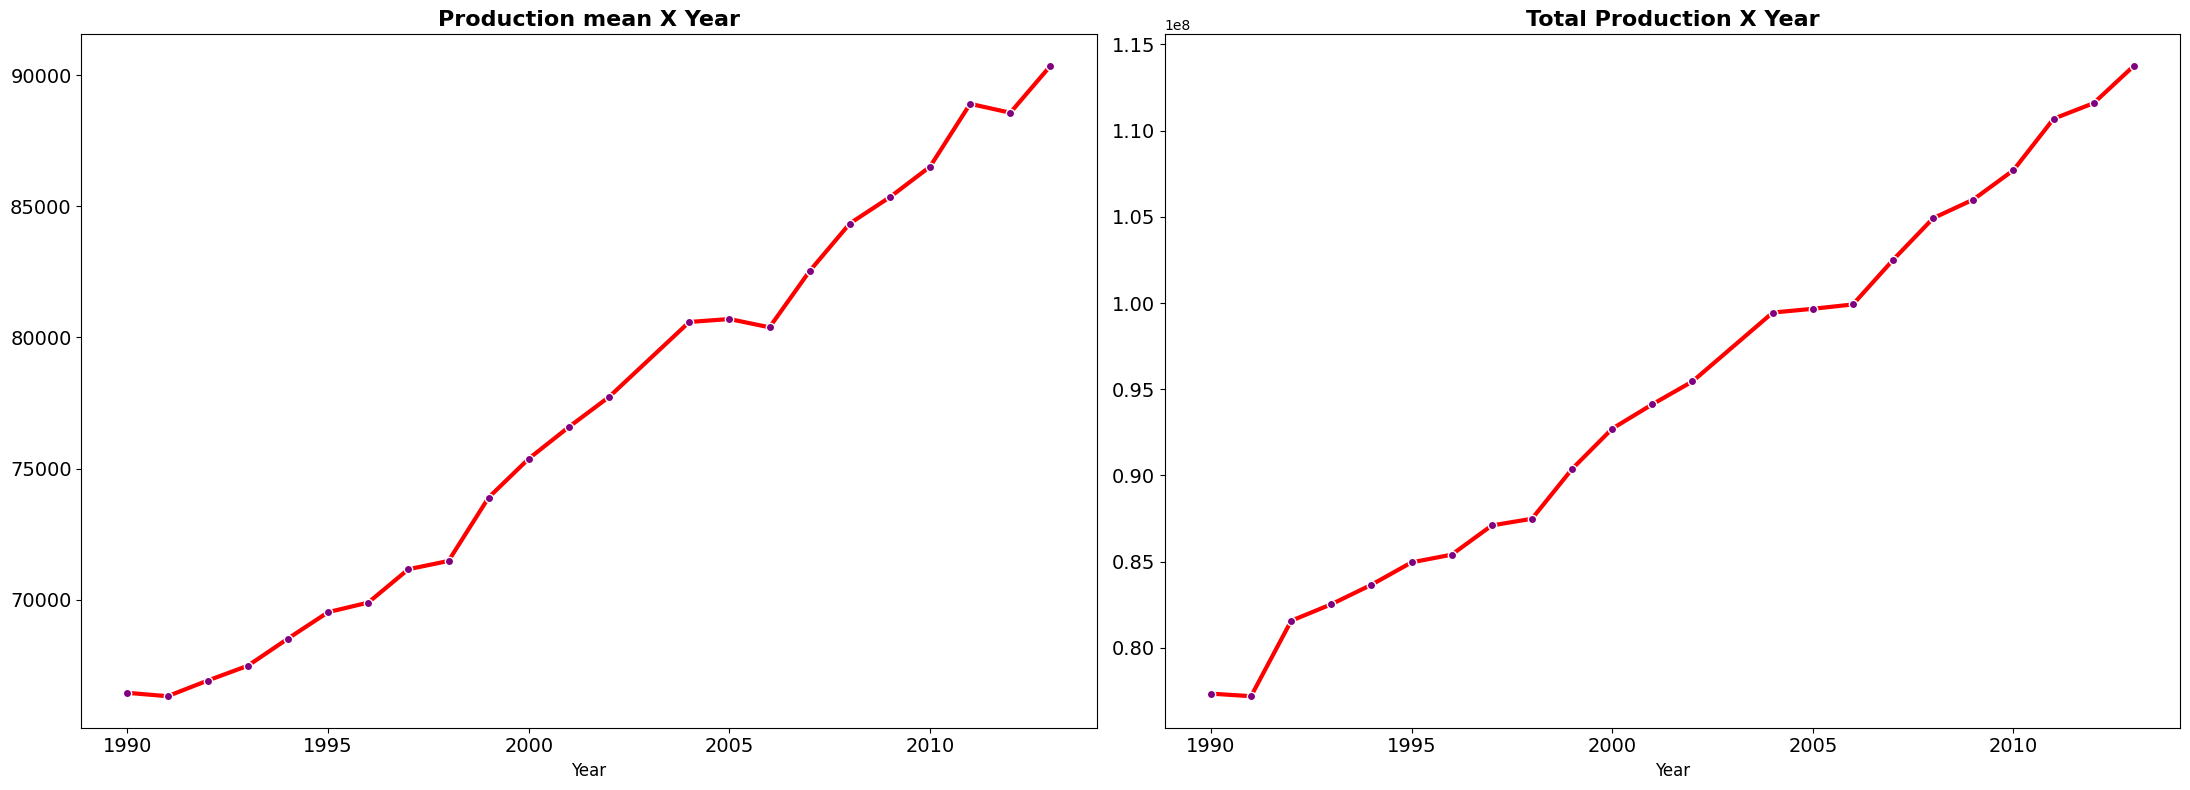

In [20]:
# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

#Checking production mean by year
plt.subplot(1,2,1)
df.groupby('Year')['hg/ha_yield'].mean().plot(kind='line', color='red', linewidth=3, marker ='o',
            markersize=6, markerfacecolor='purple', markeredgecolor='white', markeredgewidth=1)
plt.title('Production mean X Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Checking total production by year
plt.subplot(1,2,2)
df.groupby('Year')['hg/ha_yield'].sum().plot(kind='line', color='red', linewidth=3, marker ='o',
            markersize=6, markerfacecolor='purple', markeredgecolor='white', markeredgewidth=1)
plt.title('Total Production X Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

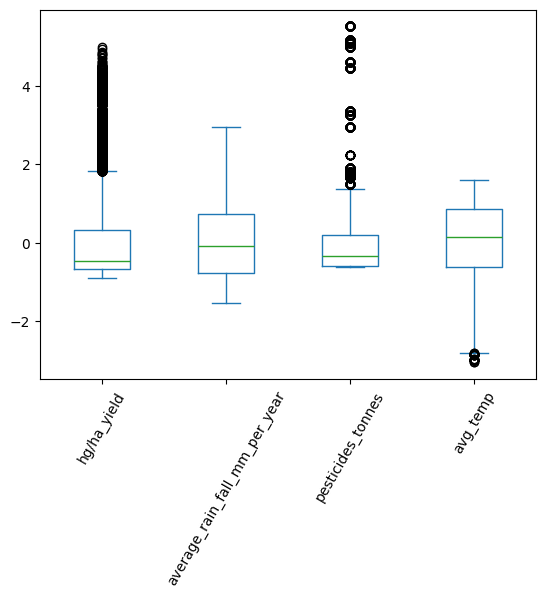

In [21]:
# Searching for outliers
df_numerical = df.drop(columns=['Area', 'Item','Year'])
df_num_scaled = df_numerical.apply(scale)
df_num_scaled.plot.box() 
plt.xticks(rotation=60)
plt.show()

In [22]:
# Checking how many outlier each feature has using Z-Score
z = np.abs((df_num_scaled - df_num_scaled.mean()) / df_num_scaled.std())
outlier_counts = (z > 3).sum()
print(outlier_counts)

hg/ha_yield                      602
average_rain_fall_mm_per_year      0
pesticides_tonnes                891
avg_temp                           2
dtype: int64


In [23]:
# Calculating the outliers ratio
outliers = z > 3
outlier_ratio = outliers.sum() / len(df_num_scaled)
outlier_ratio = (outlier_ratio * 100).sort_values(ascending=False)
print(outlier_ratio)

pesticides_tonnes                3.154876
hg/ha_yield                      2.131577
avg_temp                         0.007082
average_rain_fall_mm_per_year    0.000000
dtype: float64


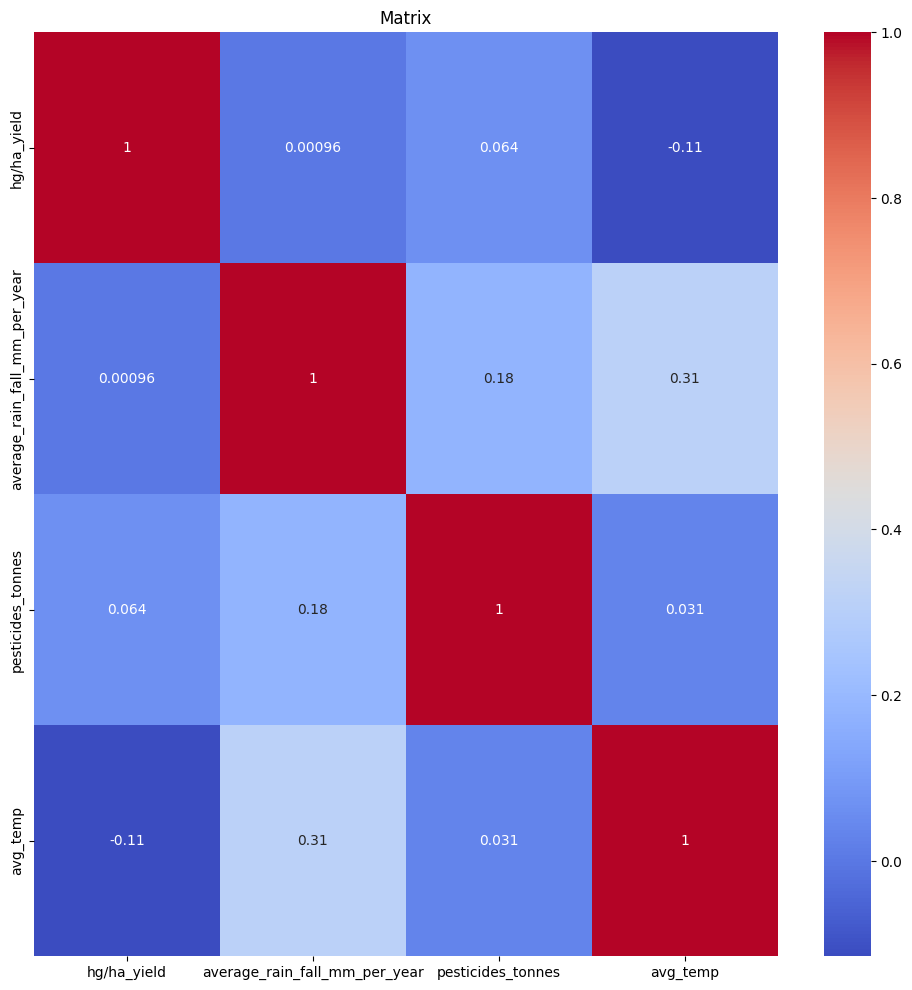

In [24]:
# Creating a heatmap to see the correlation
corr_matrix = df_numerical.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix')
plt.show()

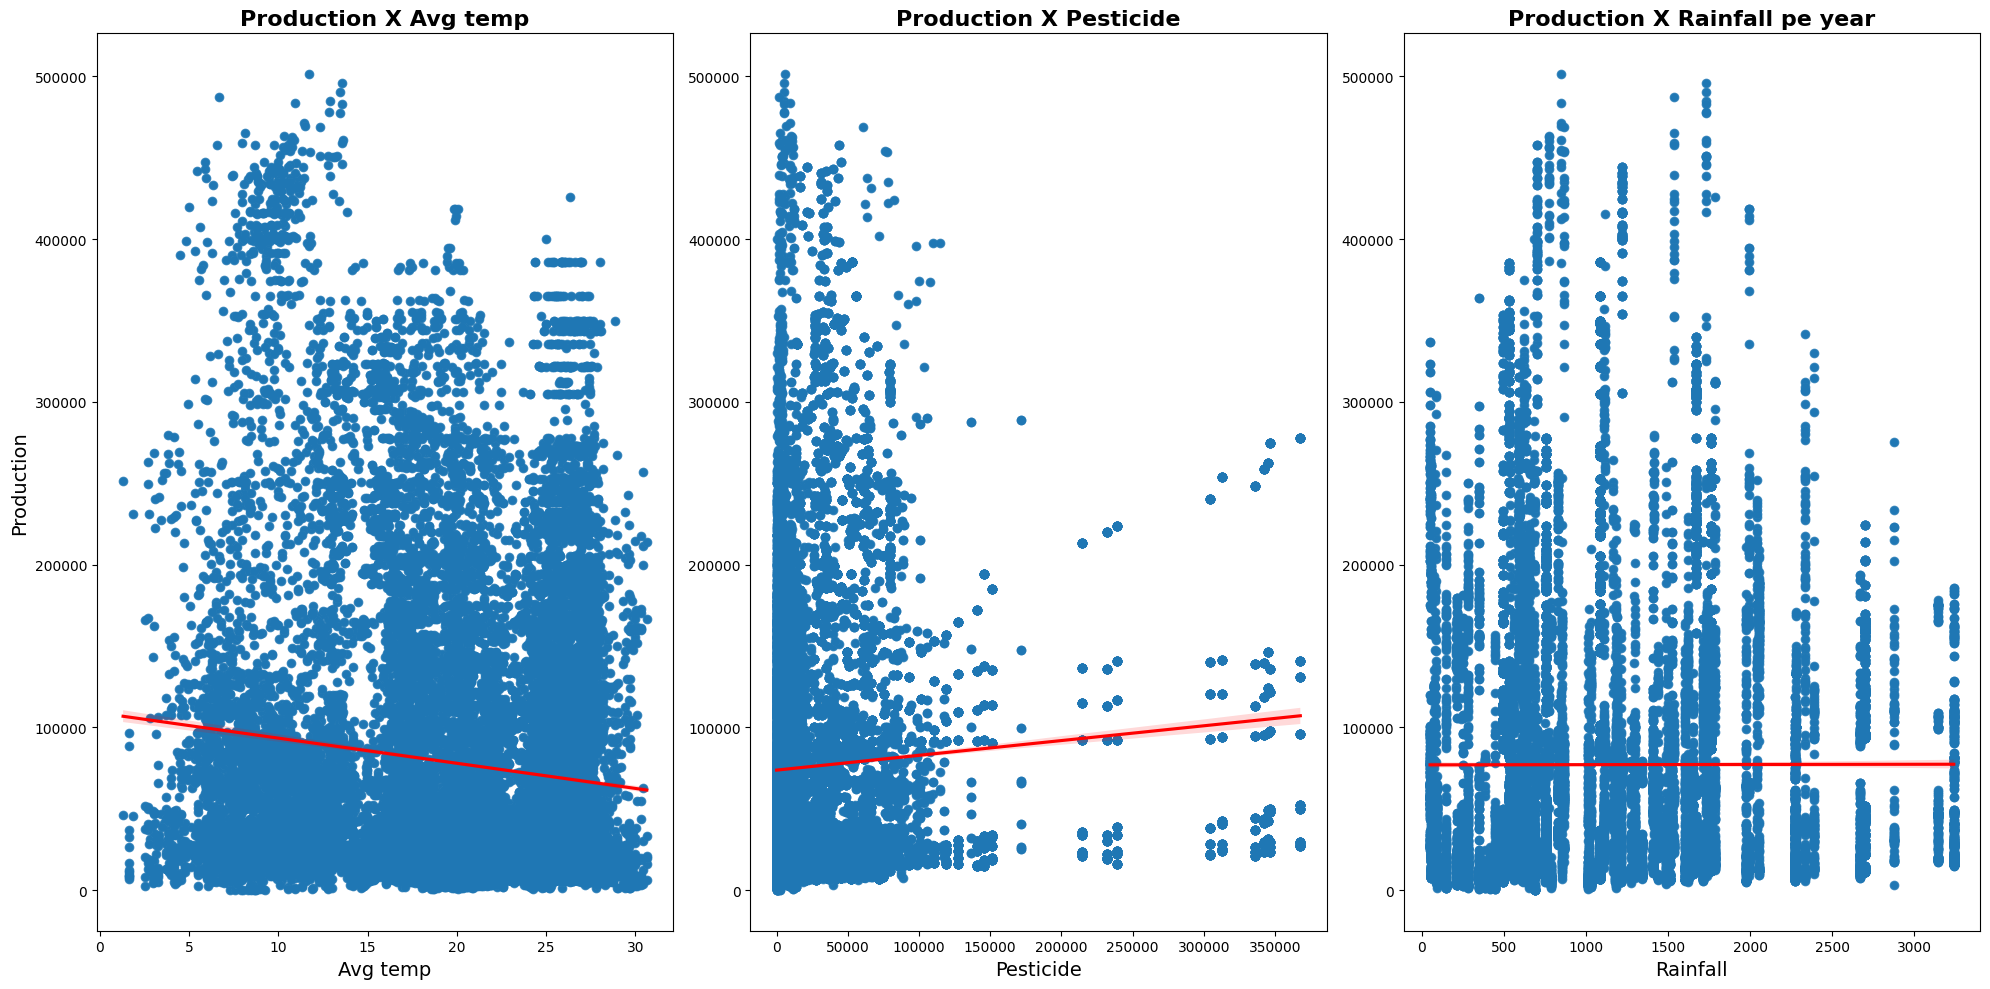

In [25]:
# Creating Scatterplots to checks 
plt.figure(figsize=(20,10))

# Scatter 'hg/ha_yield' X 'avg_temp'
plt.subplot(1,3,1)
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df)
plt.title('Production X Avg temp', fontsize=16, fontweight='bold')
sns.regplot(x='avg_temp', y='hg/ha_yield', data=df, line_kws={'color': 'red'})
plt.xlabel('Avg temp', fontsize=14)
plt.ylabel('Production', fontsize=14)

# Scatter 'hg/ha_yield' X 'pesticides_tonnes'
plt.subplot(1,3,2)
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=df)
plt.title('Production X Pesticide', fontsize=16, fontweight='bold')
sns.regplot(x='pesticides_tonnes', y='hg/ha_yield', data=df, line_kws={'color': 'red'})
plt.xlabel('Pesticide', fontsize=14)
plt.ylabel('')

# Scatter 'hg/ha_yield' X 'average_rain_fall_mm_per_year'
plt.subplot(1,3,3)
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df)
plt.title('Production X Rainfall pe year', fontsize=16, fontweight='bold')
sns.regplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df, line_kws={'color': 'red'})
plt.xlabel('Rainfall', fontsize=14)
plt.ylabel('')

plt.tight_layout()
plt.show()

**EDA Report**

First, checked if the dataset had any anomalous values, and initially, I didn't find anything strange.

When I got to the analysis of the categorical features, I found some interesting things:
1. The top 4 countries that have more data are the same top 4 with the largest total production;
2. UK and Spain don't appear in the top 10 with most records but appear in the top 10 with the largest total production;
3. The top 10 with the largest production are completely different from those with de best mean ratio to the global mean.

From the above I've drawn following conclusions:
1. The countries that produce more tend to record more data. Probably, these countries are larger exporters and therefore tend to have better systems and collect more data;
2. Countries like India, Brazil and Mexico are larger producers, but countries like UK, Belgium and Denmark are much more efficient in their production.
3. Over the years, global mean has shown to be a bit more stable than the total production, but both have very similar behavior (e.g. significant growth in the early 2000s, probably due to the commodities boom).

Then, I've searched for outliers. After generating the boxplot for the scaled numerical features, I noticed that 'hg/ha_yield', 'pesticides_tonnes' and 'avg_temp' has outliers. To get a better understanding of how many outliers each feature had, I calculated the Z-score to find the number of outliers beyond 3 standard deviations for each feature, and then I calculated their ratio. I found that 'pesticides_tonnes' and 'hg/ha_yield' had more than 2% outliers, and because of that, I decided to keep them.

Finally, I looked for correlations using a correlation matrix and scatter plots, reaching the following conclusions:
- The correlation coefficients are very low when comparing the features with 'hg/ha_yield';
- Despite this, there appears to be a negative correlation between 'hg/ha_yield' & 'avg_temp' and a positive one between 'hg/ha_yield' & 'pesticides_tonnes';
- There is alomst no correlation between 'hg/ha_yield' & 'average_rain_fall_mm_per_year'.



# 3. Data preparationa and training

## 3.1 Data preparation

In [26]:
# Checking duplicates
df.duplicated().sum()

np.int64(2310)

In [27]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(25932, 7)

In [28]:
# Separating features and target
X = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']

In [29]:
# Creating a list containing the categorical columns
categorical_features = ['Area', 'Item']

In [30]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Enconding categorical features
for col in categorical_features:
    encoder = LabelEncoder()
    encoder.fit(X_train[col])

    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [32]:
# Checking the tranformation
X_train.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Index,,,,,,
24234,81,5,2000,59.0,3024.11,26.55
9468,35,7,2012,652.0,8002.20,18.82
6793,22,1,2006,3240.0,98328.63,27.51
28212,100,3,2010,657.0,3305.17,21.17
7358,25,7,2007,1410.0,5689.80,27.08


**Data Preparation Report**
- The dataframe has 2310 duplicated data, so I've used dorp_duplicates() to remove them;
- Then I separate the features from the target, and consequently split into training and test sets.
- Finally, I encode the categorical features. Given the large number of distinct values in the 'Area' and 'Item' columns, and considering I plan to use a Tree Model, I decided to use LabelEncoder to transform these categorical features into numerical ones.

## 3.2 Training

In [33]:
# Creating and training a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [34]:
# Creating and training a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
# Creating and training a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 4. Test and Evaluate Models 

In [83]:
# Creating a report to calculate metrics
def regression_report(y_true,y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  return pd.Series({
      'MAE': f'{mae:,.2f}',
      'MSE': f'{mse:,.2f}',
      'RMSE': f'{rmse:,.2f}',
      'MAPE': f'{mape * 100:.2f}%',
      'R2': f'{r2:.4f}'
  })

In [84]:
# Using this report to evaluate metrics
models = {'Decision Tree': dt_model, 
          'Random Forest': rf_model,
          'Gradient Boosting': gb_model}

for title, model in models.items():
    y_pred = model.predict(X_test)
    print(20 * '-', title, 20 * '-')
    print(regression_report(y_test, y_pred))

-------------------- Decision Tree --------------------
MAE           4,496.28
MSE     202,606,295.78
RMSE         14,233.98
MAPE             8.36%
R2              0.9720
dtype: object
-------------------- Random Forest --------------------
MAE           4,221.72
MSE     120,997,801.84
RMSE         10,999.90
MAPE             9.15%
R2              0.9833
dtype: object
-------------------- Gradient Boosting --------------------
MAE            22,744.90
MSE     1,350,114,721.14
RMSE           36,743.91
MAPE              57.94%
R2                0.8137
dtype: object


In [85]:
# Evaluating the Random Forest
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross Validation R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross Validation R²: 0.9835 (+/- 0.0017)


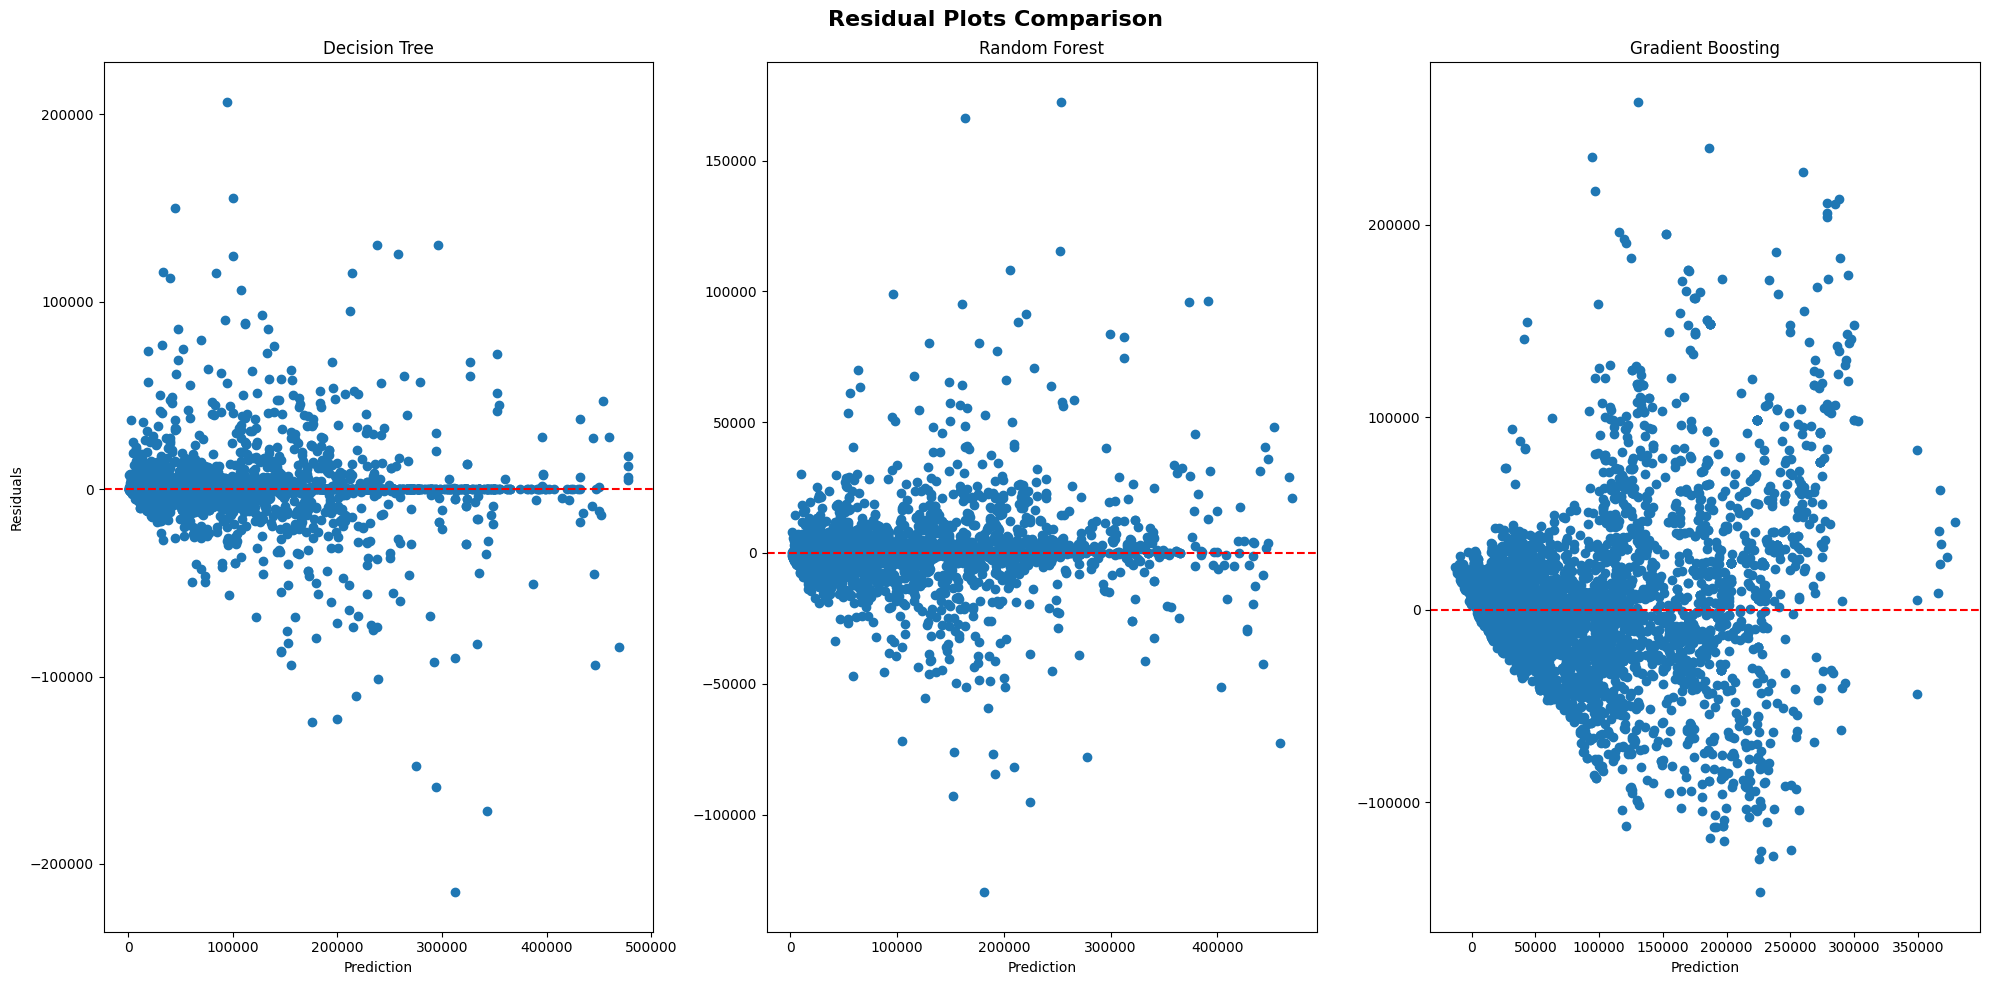

In [86]:
# Predicting each model
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Calculating residuals 
dt_residuals = y_test - dt_pred
rf_residuals = y_test - rf_pred
gb_residuals = y_test - gb_pred

# Creating Dict for the models
models_pred_res = {
    "Decision Tree": (dt_pred, dt_residuals),
    "Random Forest": (rf_pred, rf_residuals),
    "Gradient Boosting": (gb_pred, gb_residuals)
}

# Creating a Scatter plot for the residuals
plt.figure(figsize=(20,10))

for i, (name, (pred, res)) in enumerate(models_pred_res.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(pred, res)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(name)
    plt.xlabel("Prediction")
    if i == 1:
        plt.ylabel("Residuals")
plt.suptitle("Residual Plots Comparison", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

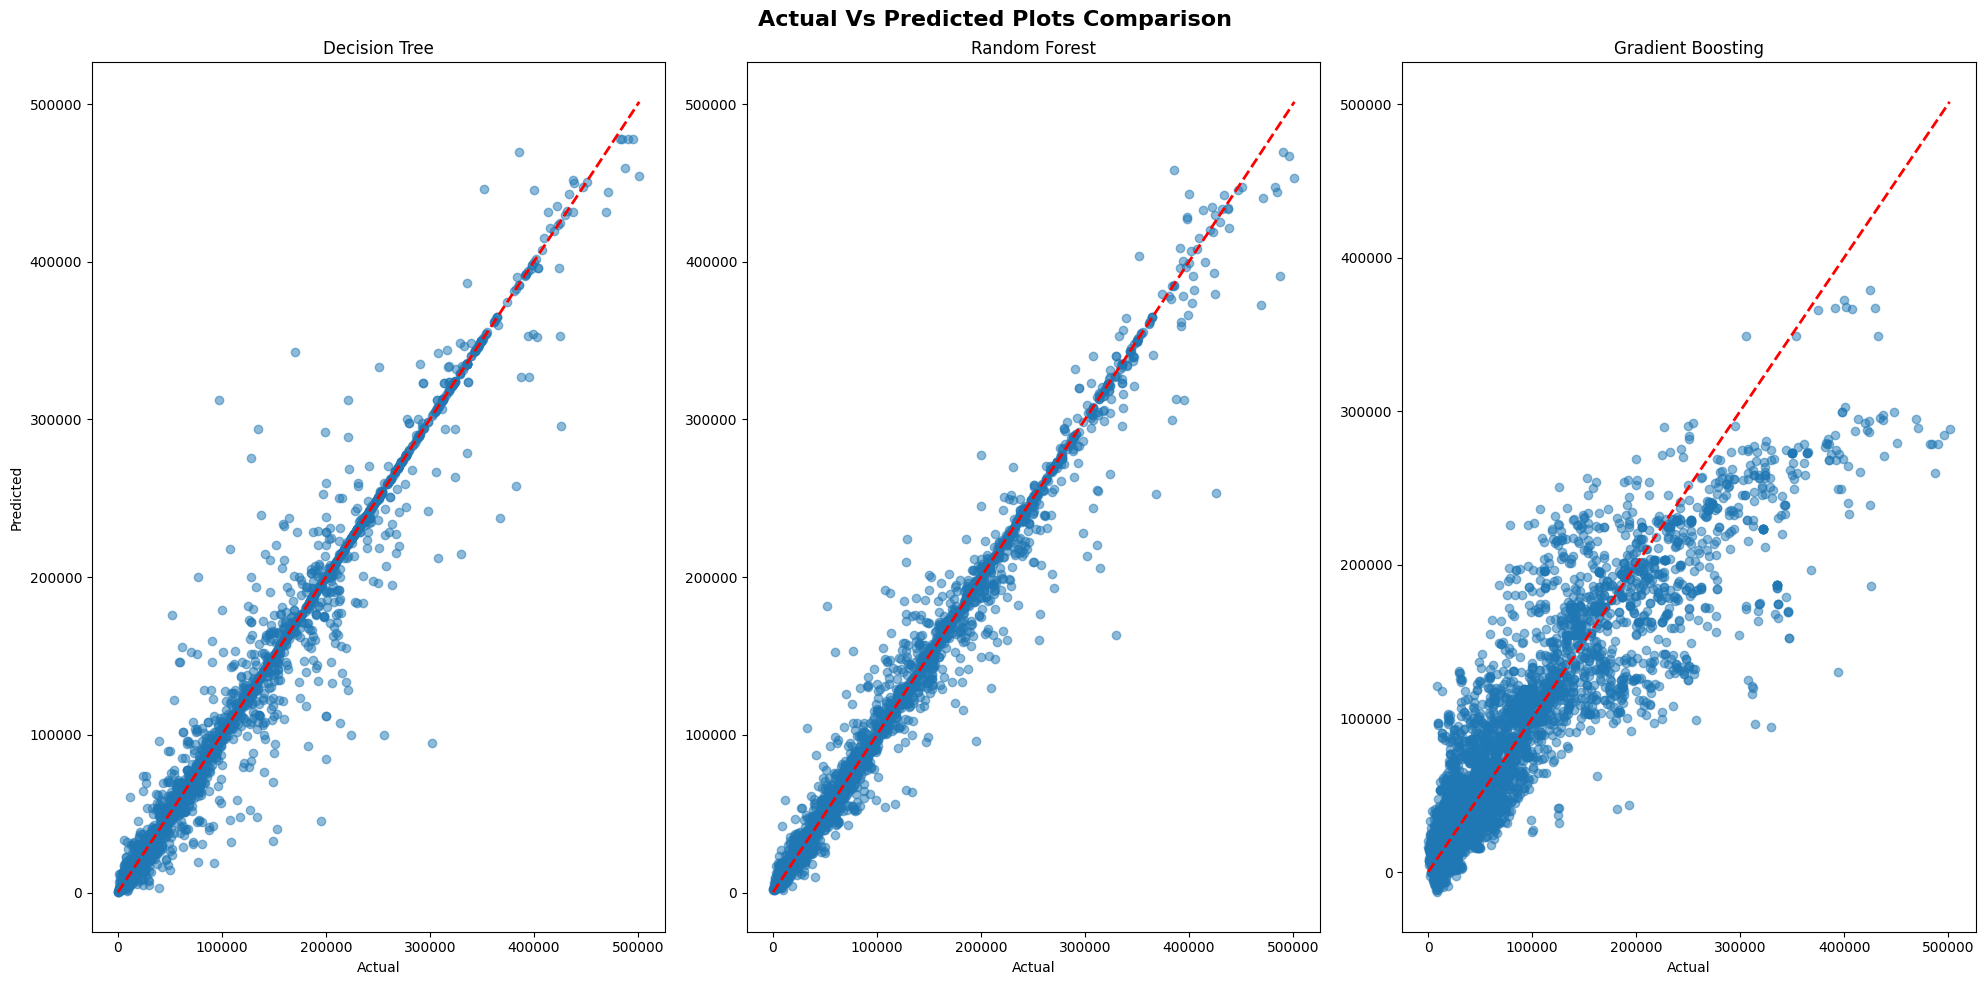

In [87]:
# Creating a Scatter plot comparing Predictd Vs Actual
plt.figure(figsize=(20, 10))

for i, (name, (pred, res)) in enumerate(models_pred_res.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'r--', lw=2)
    plt.title(name)
    plt.xlabel("Actual")
    if i == 1:
        plt.ylabel("Predicted")
plt.suptitle("Actual Vs Predicted Plots Comparison", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

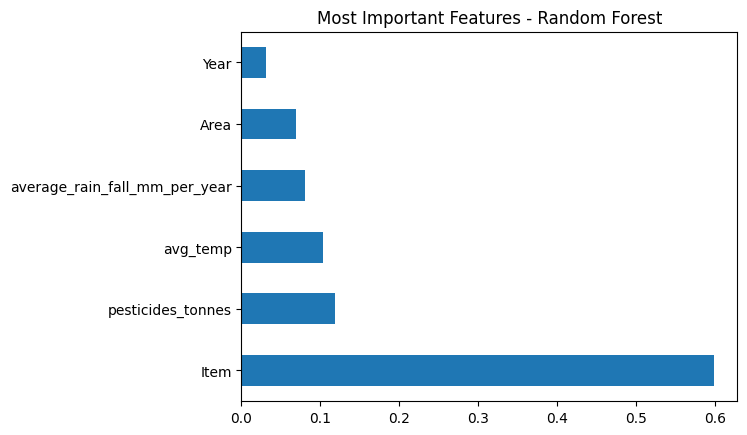

In [88]:
# Verfing which features is more importante - Random Forest
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("Most Important Features - Random Forest")
plt.show()

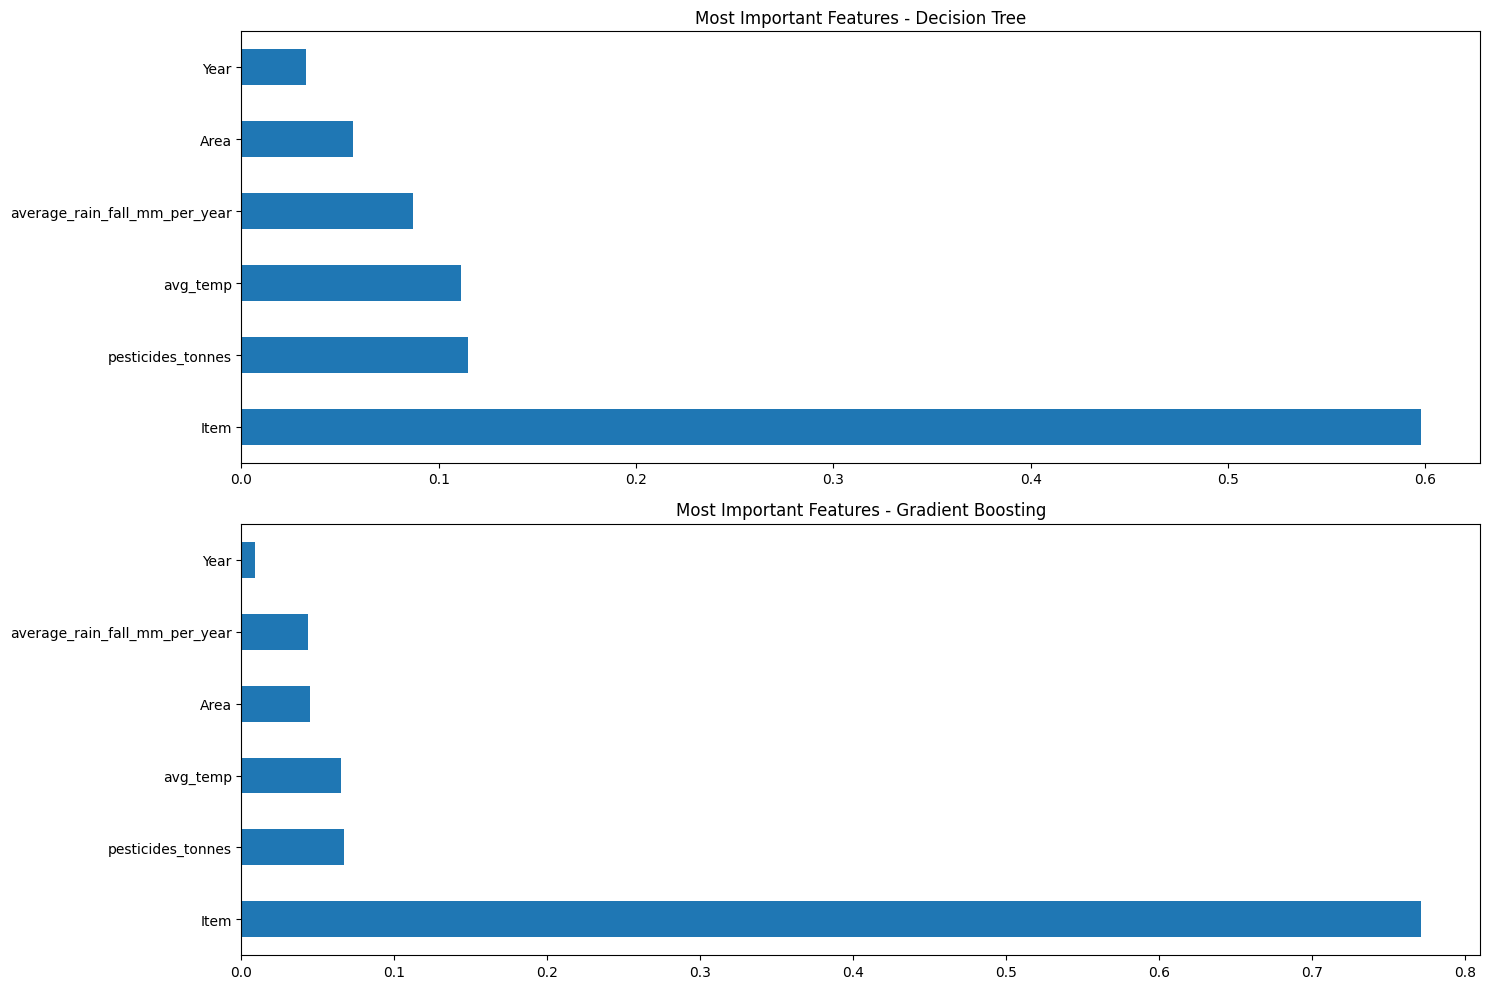

In [89]:
# Comparing Feature importance between models
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
importance = pd.Series(dt_model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("Most Important Features - Decision Tree")

plt.subplot(2,1,2)
importance = pd.Series(gb_model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("Most Important Features - Gradient Boosting")

plt.tight_layout()
plt.show()

After observing the three models, the following conclusions emerged:
- Random Forest performed slightly better than Decision Tree and proved to be the best model with standard parameters, so it will serve as the baseline for hyperparameter testing;
- Gradient Boosting with standard parameters was a disaster;
- One interesting point to note is that I initially suspected Random Forest might be overfitting due to its very high R² score. However, using Cross Validation confirmed that Random Forest is indeed the best model under initial conditions.
- Looking at the residuals and actual vs prediciont plots, it is possible to see that Random Forest has a lower variability of the residuals than the Decision Tree, and Gradient Boosting clearly has a high variability.
- Verifying the feature importance, it is possible to note that which crop is produced is the most relevant feature. However, there is a problem because the difference to the other features is high, so maybe it would be needed to restart the process without this feature, but first I will compare with the other models.
- Comparing feature importance between the models, there are only small changes in the features of Gradient Boosting, but all models show the anomalous difference between the feature 'Item' and the others.
